In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as st

Построить в схеме Бернулли график абсолютного риска для а) оценки X б) байесовской оценки для
квадратичного риска с равномерной априорной плотностью в) байесовской оценки для абсолютного
риска с равномерной априорной плотностью по выборке размера а) n = 3, б) n = 10.

/var/folders/05/gtdbjdrs6z51grnhmq4r4_q40000gn/T/ipykernel_24449/1766775058.py:11: RuntimeWarning: divide by zero encountered in scalar power
  result+=(theta*(n+2)-i-1)*math.comb(n,i)*theta**i*(1-theta)**(n-i)
/var/folders/05/gtdbjdrs6z51grnhmq4r4_q40000gn/T/ipykernel_24449/1766775058.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  result+=(theta*(n+2)-i-1)*math.comb(n,i)*theta**i*(1-theta)**(n-i)


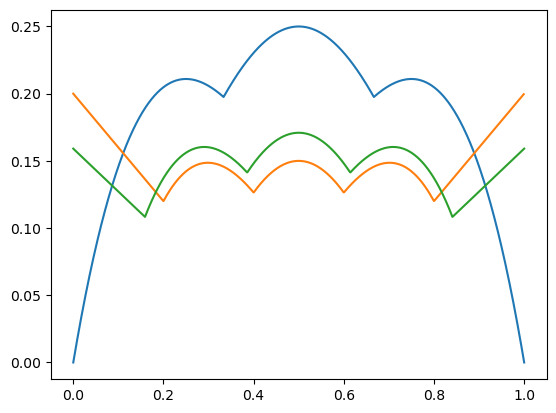

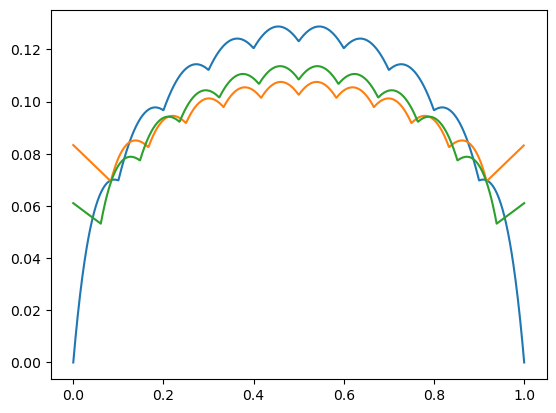

In [21]:
def RXbar(theta,n):
	result=0
	for i in range(int(np.floor(n*theta))+1):
		result+=(n*theta-i)*math.comb(n,i)*theta**i*(1-theta)**(n-i)
	for i in range(int(np.floor(n*theta))+1,n+1):
		result+=(i-n*theta)*math.comb(n,i)*theta**i*(1-theta)**(n-i)
	return result/n
def RBSQ(theta,n):
	result=0
	for i in range(int(np.floor(theta*(n+2)))):
		result+=(theta*(n+2)-i-1)*math.comb(n,i)*theta**i*(1-theta)**(n-i)
	for i in range(int(np.floor(theta*(n+2))),n+1):
		result+=(i+1-(n+2)*theta)*math.comb(n,i)*theta**i*(1-theta)**(n-i)
	return result/(n+2)
def RBAB(theta,n):
	result=0
	for i in range(int(separator(theta,n))):
		result+=(theta-st.beta.ppf(0.5,i+1,n-i+1))*math.comb(n,i)*theta**i*(1-theta)**(n-i)
	for i in range(int(separator(theta,n)),n+1):
		result+=(st.beta.ppf(0.5,i+1,n-i+1)-theta)*math.comb(n,i)*theta**i*(1-theta)**(n-i)
	return result
def separator(theta,n):
	x=-1
	i=0
	while x<theta:
		x=st.beta.ppf(0.5,i+1,n-i+1)
		i+=1
	return i-1
nmas=[3,10]
for n in nmas:
	x=np.linspace(0,1,1000)
	plt.plot(x,[RXbar(i,n) for i in x])
	plt.plot(x,[RBSQ(i,n) for i in x])
	plt.plot(x,[RBAB(i,n) for i in x])
	plt.show()